In [27]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [4]:
# df = pd.read_csv("sample_data/cleveland.data", delim_whitespace=True, encoding='utf-8', on_bad_lines='skip')
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df1 = pd.read_csv("processed.cleveland2.csv", names=column_names, na_values=["?"])
df1[['trestbps']]=df1[['trestbps']].replace(0,np.nan)
df1[['chol','thalach']]=df1[['chol','thalach']].replace(99999,np.nan)
df1.dropna(inplace=True)

In [33]:
# df = pd.read_csv("sample_data/cleveland.data", delim_whitespace=True, encoding='utf-8', on_bad_lines='skip')
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv("processed.cleveland.data", names=column_names, na_values=["?"])
df.dropna(inplace=True)
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [34]:
X = df.drop(['num'], axis = 1)
Y = df['num']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

In [35]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [36]:
forest_test(X, Y)

0.453125
[[50  0  2  1  0]
 [10  3  1  5  0]
 [ 2  0  3  4  3]
 [ 1  3  0  1  1]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        53
           1       0.50      0.16      0.24        19
           2       0.50      0.25      0.33        12
           3       0.09      0.17      0.12         6
           4       0.00      0.00      0.00         0

    accuracy                           0.63        90
   macro avg       0.38      0.30      0.31        90
weighted avg       0.65      0.63      0.61        90



C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PCA

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2','PC3','PC4','PC5'])
PCA_df = pd.concat([PCA_df, df['num']], axis = 1)
PCA_df['num'] = LabelEncoder().fit_transform(PCA_df['num'])
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,num
0,1.130664,1.087655,3.164263,2.293052,-0.023175,0
1,3.190926,1.417885,-0.533715,-0.857970,0.006289,2
2,3.124339,-0.657008,-0.285134,-0.626641,-0.152793,1
3,-0.484339,-1.410972,0.397806,2.832741,-0.721309,0
4,-2.284542,0.330033,-0.072260,1.209318,-0.770835,0


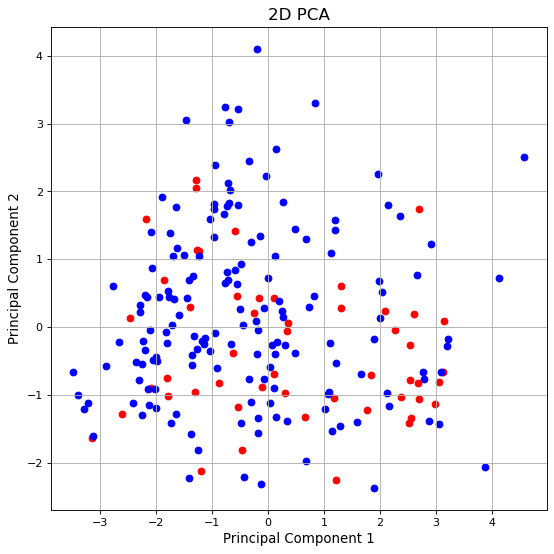

In [38]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['num'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['num'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
#plt.legend(['Poisonous', 'Edible'])
plt.grid()

In [39]:
pca = PCA(n_components=3,svd_solver='full')
X_pca = pca.fit_transform(X)
print(pca.explained_variance_)
forest_test(X_pca, Y)

[3.09076392 1.61085694 1.25271584]
0.984375
[[47  3  2  1  0]
 [11  5  1  0  2]
 [ 1  1  1  6  3]
 [ 1  0  2  2  1]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        53
           1       0.56      0.26      0.36        19
           2       0.17      0.08      0.11        12
           3       0.22      0.33      0.27         6
           4       0.00      0.00      0.00         0

    accuracy                           0.61        90
   macro avg       0.35      0.31      0.31        90
weighted avg       0.62      0.61      0.60        90



C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Independent Component Analysis (ICA)

In [40]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)

forest_test(X_ica, Y)

0.859375
[[47  4  1  1  0]
 [10  5  2  1  1]
 [ 1  1  2  6  2]
 [ 1  0  2  3  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        53
           1       0.50      0.26      0.34        19
           2       0.29      0.17      0.21        12
           3       0.27      0.50      0.35         6
           4       0.00      0.00      0.00         0

    accuracy                           0.63        90
   macro avg       0.37      0.36      0.35        90
weighted avg       0.63      0.63      0.62        90



C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Linear Discriminant Analysis (LDA)

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, Y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 13
Reduced number of features: 1


In [42]:
forest_test(X_lda, Y)

0.34375
[[42  9  1  1  0]
 [ 8  6  1  3  1]
 [ 2  1  3  2  4]
 [ 1  0  1  4  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        53
           1       0.38      0.32      0.34        19
           2       0.50      0.25      0.33        12
           3       0.40      0.67      0.50         6
           4       0.00      0.00      0.00         0

    accuracy                           0.61        90
   macro avg       0.41      0.40      0.39        90
weighted avg       0.64      0.61      0.62        90



C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_lda, Y, 
                                                                        test_size = 0.30, 
                                                                        random_state = 101)

start = time.process_time()
lda = LinearDiscriminantAnalysis().fit(X_Reduced,Y_Reduced)
print(time.process_time() - start)
predictionlda = lda.predict(X_Test_Reduced)
print(confusion_matrix(Y_Test_Reduced,predictionlda))
print(classification_report(Y_Test_Reduced,predictionlda))

0.0
[[40  2  0  2  0]
 [ 9  6  2  2  0]
 [ 0  2  4  6  0]
 [ 1  3  2  5  0]
 [ 0  0  0  2  0]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        44
           1       0.46      0.32      0.37        19
           2       0.50      0.33      0.40        12
           3       0.29      0.45      0.36        11
           4       0.00      0.00      0.00         2

    accuracy                           0.62        88
   macro avg       0.41      0.40      0.40        88
weighted avg       0.60      0.62      0.61        88



C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


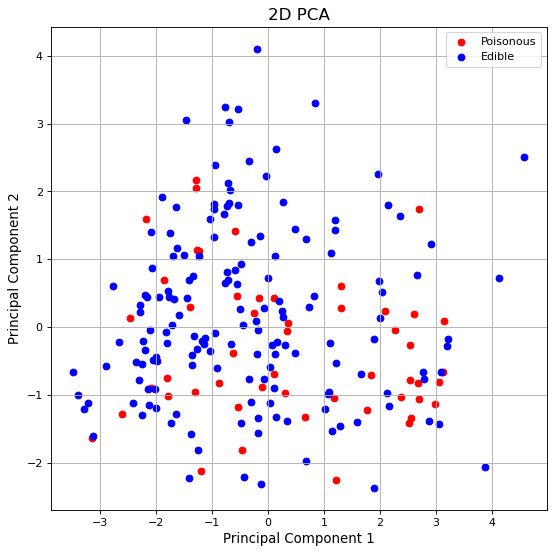

In [43]:

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['num'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['num'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Poisonous', 'Edible'])
plt.grid()

In [44]:
from keras.layers import Input, Dense
from keras.models import Model

input_layer = Input(shape=(X.shape[1],))
encoded = Dense(3, activation='relu')(input_layer)
decoded = Dense(X.shape[1], activation='softmax')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

X1, X2, Y1, Y2 = train_test_split(X, X, test_size=0.3, random_state=101)

autoencoder.fit(X1, Y1,
                epochs=100,
                batch_size=300,
                shuffle=True,
                verbose = 30,
                validation_data=(X2, Y2))

encoder = Model(input_layer, encoded)
X_ae = encoder.predict(X)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [45]:
forest_test(X_ae, Y)

0.46875
[[42  7  1  2  1]
 [12  4  1  1  1]
 [ 7  2  1  0  2]
 [ 4  0  1  1  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        53
           1       0.31      0.21      0.25        19
           2       0.25      0.08      0.12        12
           3       0.25      0.17      0.20         6
           4       0.00      0.00      0.00         0

    accuracy                           0.53        90
   macro avg       0.29      0.25      0.26        90
weighted avg       0.50      0.53      0.50        90



C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Reducing the number of features in a dataset

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import time
import os

In [47]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
age,0.0
sex,0.0
cp,0.0
trestbps,0.0
chol,0.0
fbs,0.0
restecg,0.0
thalach,0.0
exang,0.0
oldpeak,0.0


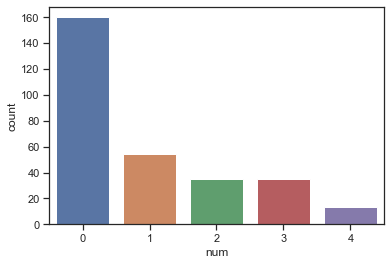

In [52]:
sns.set(style="ticks")
f = sns.countplot(x="num", data=df)
plt.show()

In [49]:
df['num'].value_counts()

0    160
1     54
2     35
3     35
4     13
Name: num, dtype: int64

In [53]:
df.shape

(297, 14)

In [54]:
X = df.drop(['num'], axis = 1)
Y = df['num']

In [55]:
X = pd.get_dummies(X, prefix_sep='_')
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [56]:
len(X.columns)

13

In [57]:
Y = LabelEncoder().fit_transform(Y)
#np.set_printoptions(threshold=np.inf)
Y

array([0, 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 3, 4, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 3, 1, 3, 0, 4, 0, 0, 0,
       1, 4, 0, 4, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 2, 3, 1,
       1, 0, 2, 2, 0, 0, 0, 3, 2, 3, 4, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 3, 1, 0, 0, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 4, 3,
       1, 1, 1, 2, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 4, 1, 0, 1,
       0, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 1, 0, 0, 0, 3, 2, 0, 2, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 4, 2, 2,
       1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 2, 4, 2, 0, 0, 1,
       0, 2, 2, 1, 0, 3, 1, 1, 2, 3, 1], dtype=int6

# Machine Learning

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

X2 = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X2, Y, test_size = 0.30, random_state = 101)

In [59]:
start = time.process_time()
trainedmodel = LogisticRegression().fit(X_Train,Y_Train)
print(time.process_time() - start)
predictions =trainedmodel.predict(X_Test)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

0.0
[[49  2  1  0  1]
 [ 9  6  0  4  0]
 [ 0  1  3  3  5]
 [ 1  0  2  2  1]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88        53
           1       0.67      0.32      0.43        19
           2       0.50      0.25      0.33        12
           3       0.22      0.33      0.27         6
           4       0.00      0.00      0.00         0

    accuracy                           0.67        90
   macro avg       0.44      0.36      0.38        90
weighted avg       0.71      0.67      0.67        90



C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
start = time.process_time()
trainedsvm = svm.LinearSVC().fit(X_Train, Y_Train)
print(time.process_time() - start)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

0.015625
[[49  2  1  0  1]
 [10  3  0  5  1]
 [ 1  0  3  5  3]
 [ 1  0  2  2  1]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        53
           1       0.60      0.16      0.25        19
           2       0.50      0.25      0.33        12
           3       0.17      0.33      0.22         6
           4       0.00      0.00      0.00         0

    accuracy                           0.63        90
   macro avg       0.41      0.33      0.33        90
weighted avg       0.68      0.63      0.62        90



C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set t

In [61]:
start = time.process_time()
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
print(time.process_time() - start)
predictionstree = trainedtree.predict(X_Test)
print(confusion_matrix(Y_Test,predictionstree))
print(classification_report(Y_Test,predictionstree))

0.0
[[41  6  2  2  2]
 [ 7  4  1  3  4]
 [ 1  1  6  2  2]
 [ 0  2  2  1  1]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        53
           1       0.31      0.21      0.25        19
           2       0.55      0.50      0.52        12
           3       0.12      0.17      0.14         6
           4       0.00      0.00      0.00         0

    accuracy                           0.58        90
   macro avg       0.36      0.33      0.34        90
weighted avg       0.64      0.58      0.61        90



C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

0.453125
[[50  0  2  1  0]
 [11  2  1  5  0]
 [ 2  0  5  4  1]
 [ 1  2  1  1  1]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        53
           1       0.50      0.11      0.17        19
           2       0.56      0.42      0.48        12
           3       0.09      0.17      0.12         6
           4       0.00      0.00      0.00         0

    accuracy                           0.64        90
   macro avg       0.39      0.33      0.32        90
weighted avg       0.65      0.64      0.61        90



C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

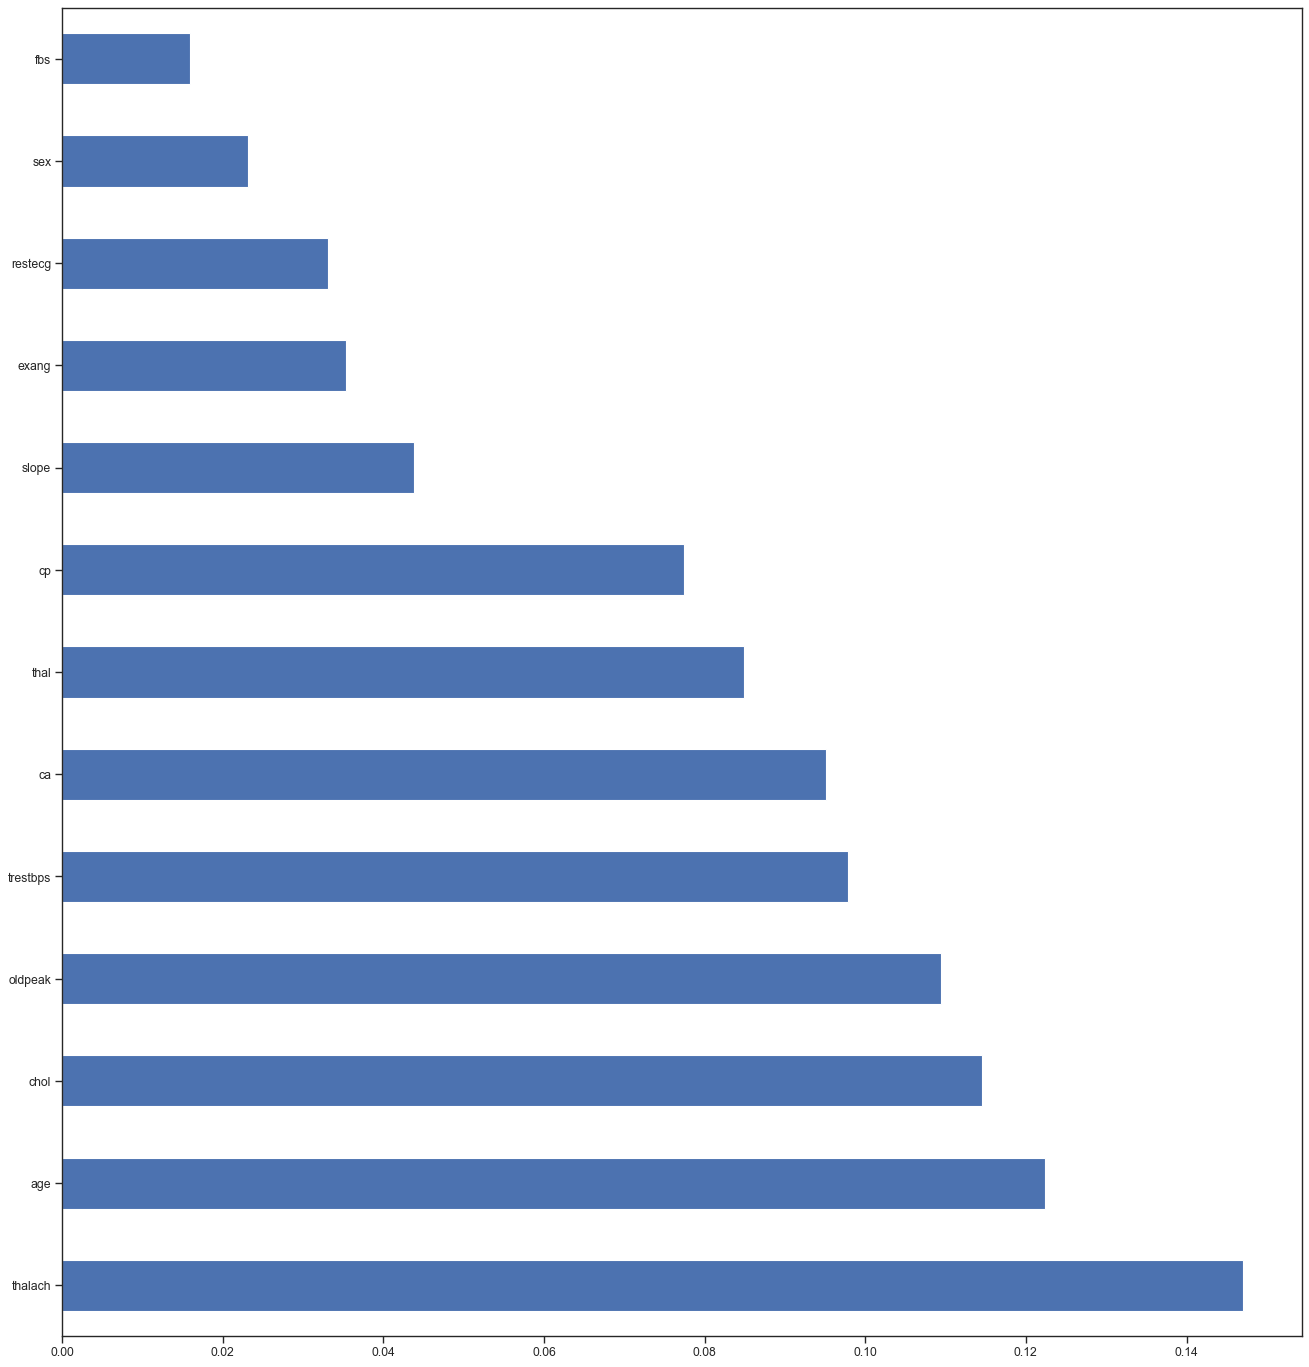

In [66]:
figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns)
feat_importances.nlargest(19).plot(kind='barh')

In [67]:
X_Reduced = X[['thalach','age', 'chol','oldpeak']]
X_Reduced = StandardScaler().fit_transform(X_Reduced)
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_Reduced, Y, test_size = 0.30, random_state = 101)

In [68]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train2,Y_Train2)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test2)
print(confusion_matrix(Y_Test2,predictionforest))
print(classification_report(Y_Test2,predictionforest))

0.484375
[[46  3  3  1  0]
 [15  1  0  2  1]
 [ 3  4  5  0  0]
 [ 1  3  1  1  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        53
           1       0.09      0.05      0.07        19
           2       0.56      0.42      0.48        12
           3       0.25      0.17      0.20         6
           4       0.00      0.00      0.00         0

    accuracy                           0.59        90
   macro avg       0.32      0.30      0.30        90
weighted avg       0.53      0.59      0.55        90



C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Recursive Feature Elimination

In [76]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier(n_estimators=700)
rfe = RFE(model, 13)
start = time.process_time()
RFE_X_Train = rfe.fit_transform(X_Train,Y_Train)
RFE_X_Test = rfe.transform(X_Test)
rfe = rfe.fit(RFE_X_Train,Y_Train)
print(time.process_time() - start)
print("Overall Accuracy using RFE: ", rfe.score(RFE_X_Test,Y_Test))

C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.9375
Overall Accuracy using RFE:  0.6555555555555556


In [78]:
model = RandomForestClassifier(n_estimators=700)
rfe = RFE(model, 5)
RFE_X_Train = rfe.fit_transform(X_Train,Y_Train)
model.fit(RFE_X_Train,Y_Train) 
print("Number of Features: ", rfe.n_features_)
print("Selected Features: ")
colcheck = pd.Series(rfe.support_,index = list(X.columns))
colcheck[colcheck == True].index

C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Number of Features:  5
Selected Features: 


Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

In [80]:
model = RandomForestClassifier(n_estimators=700)
rfe = RFE(model, 4)
RFE_X_Train = rfe.fit_transform(X_Train,Y_Train)
model.fit(RFE_X_Train,Y_Train) 
print("Number of Features: ", rfe.n_features_)
print("Selected Features: ")
colcheck = pd.Series(rfe.support_,index = list(X.columns))
colcheck[colcheck == True].index

C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Number of Features:  4
Selected Features: 


Index(['age', 'chol', 'thalach', 'oldpeak'], dtype='object')

# SelectFromModel: Meta-transformer for selecting features based on importance weights.

In [81]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

model = ExtraTreesClassifier()
start = time.process_time()
model = model.fit(X_Train,Y_Train)
model = SelectFromModel(model, prefit=True)
print(time.process_time() - start)
Selected_X = model.transform(X_Train)
Selected_X.shape

0.03125


(207, 7)

In [82]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(Selected_X, Y_Train)
print(time.process_time() - start)
Selected_X_Test = model.transform(X_Test)
predictionforest = trainedforest.predict(Selected_X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

0.5
[[49  2  1  1  0]
 [14  1  1  3  0]
 [ 3  1  4  4  0]
 [ 1  1  1  1  2]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.82        53
           1       0.20      0.05      0.08        19
           2       0.57      0.33      0.42        12
           3       0.11      0.17      0.13         6
           4       0.00      0.00      0.00         0

    accuracy                           0.61        90
   macro avg       0.32      0.30      0.29        90
weighted avg       0.56      0.61      0.56        90



C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature ranking:
1. feature 3 (0.195278)
2. feature 0 (0.154615)
3. feature 2 (0.150796)
4. feature 4 (0.148894)
5. feature 1 (0.131156)
6. feature 5 (0.115892)
7. feature 6 (0.103369)


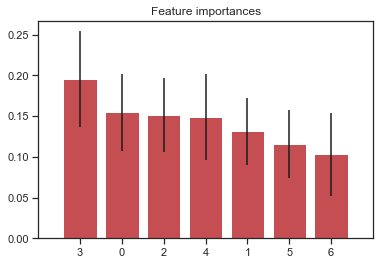

In [83]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
importances = trainedforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in trainedforest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Selected_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Selected_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(Selected_X.shape[1]), indices)
plt.xlim([-1, Selected_X.shape[1]])
plt.show()

# Univariate Feature Selection

In [84]:
min_max_scaler = preprocessing.MinMaxScaler()
Scaled_X = min_max_scaler.fit_transform(X2)

In [86]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=3).fit_transform(Scaled_X, Y)
X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X_new, Y, test_size = 0.30, random_state = 101)
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train3,Y_Train3)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test3)
print(confusion_matrix(Y_Test3,predictionforest))
print(classification_report(Y_Test3,predictionforest))

0.359375
[[48  1  0  3  1]
 [ 8  2  3  5  1]
 [ 1  3  3  4  1]
 [ 1  2  0  2  1]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.86        53
           1       0.25      0.11      0.15        19
           2       0.50      0.25      0.33        12
           3       0.14      0.33      0.20         6
           4       0.00      0.00      0.00         0

    accuracy                           0.61        90
   macro avg       0.34      0.32      0.31        90
weighted avg       0.62      0.61      0.60        90



C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Lasso Regression

In [99]:
from sklearn.linear_model import LassoCV

regr = LassoCV(cv=15, random_state=101)
regr.fit(X_Train,Y_Train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_Test, Y_Test))
model_coef = pd.Series(regr.coef_, index = list(X.columns[:]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0))) 

LassoCV Best Alpha Scored:  0.058022498521569606
LassoCV Model Accuracy:  0.38673663841310424
Variables Eliminated:  4
Variables Kept:  9


Text(0.5, 1.0, 'Most Important Features Identified using Lasso (!0)')

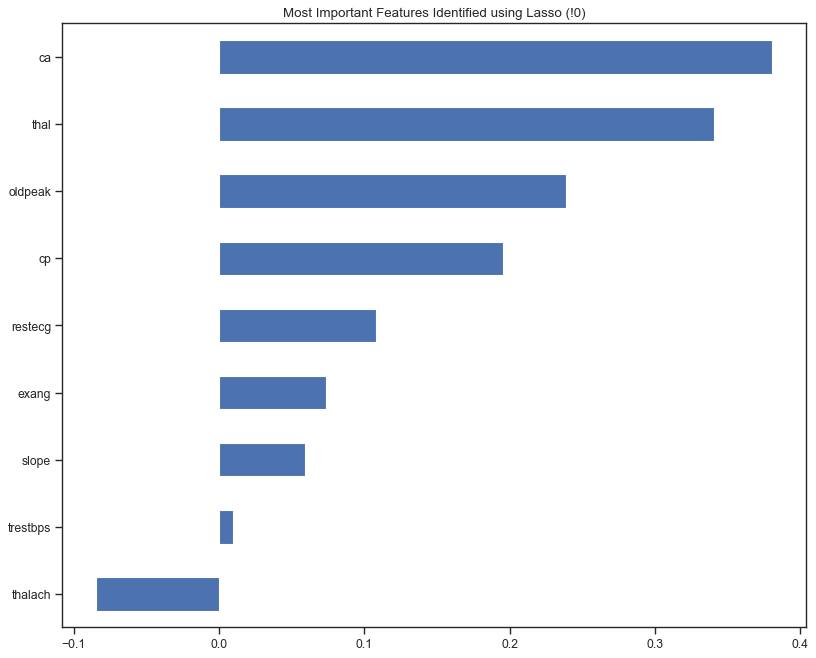

In [100]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values()
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")